In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"devjethva","key":"b72d2bf70fe433284d7967e43915da08"}'}

In [2]:
!pip install -q kaggle

In [6]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 23.6MB/s]


In [11]:
!unzip diabetes-data-set.zip -d dataset

Archive:  diabetes-data-set.zip
  inflating: dataset/diabetes.csv    


In [12]:
!rm diabetes-data-set.zip

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
data = pd.read_csv("/content/dataset/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
X = data.drop(columns= ["Outcome"], axis=1)


In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
y = data.Outcome

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
X_train, X_vald, y_train, y_valid = train_test_split(X_train,y_train)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [30]:
model = Sequential()
# first line me hi input dim add karvana
model.add(Dense(1000, input_dim = 8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              9000      
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 500)               500500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [32]:
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [33]:
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_vald, y_valid))

Epoch 1/50
14/14 [==============================] - 5s 22ms/step - loss: 49.1391 - accuracy: 0.5301 - val_loss: 0.8238 - val_accuracy: 0.6389
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7328 - accuracy: 0.5995 - val_loss: 0.6780 - val_accuracy: 0.6667
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7253 - accuracy: 0.6296 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7159 - accuracy: 0.6250 - val_loss: 0.6661 - val_accuracy: 0.7153
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.6227 - val_loss: 0.6505 - val_accuracy: 0.6667
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6530 - accuracy: 0.6690 - val_loss: 0.6305 - val_accuracy: 0.6597
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6492 - accuracy: 0.6551 - val_loss: 0.6449 - val_accuracy: 0.7153
Epoch 8/50
14/14 [

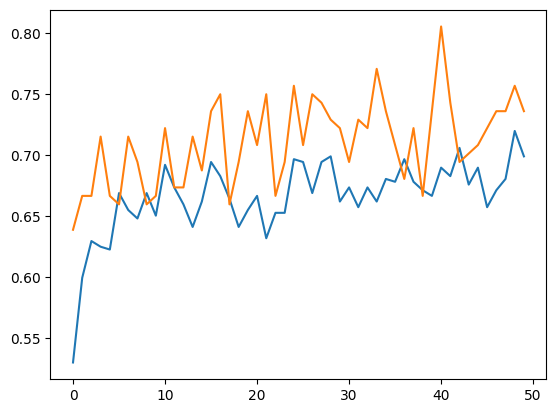

In [36]:
plt.plot(hist.history['accuracy'], label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')


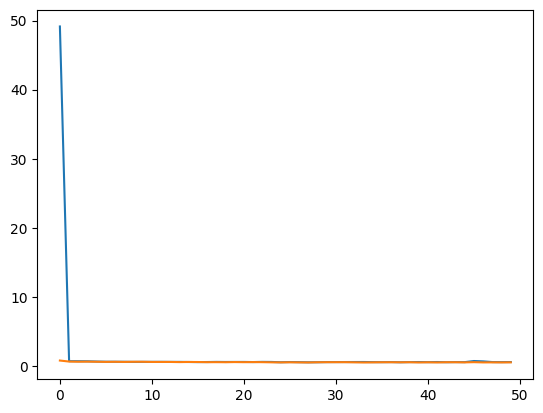

In [37]:
plt.plot(hist.history['loss'], label = 'Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')


In [38]:
from sklearn.metrics import classification_report

In [42]:
# prompt: Please print Classification report

ypred = model.predict(X_test)

6/6 [==============================] - 0s 5ms/step


In [43]:
ypred

array([[0.46558744],
       [0.27317786],
       [0.36188298],
       [0.27659988],
       [0.27267003],
       [0.37897667],
       [0.350633  ],
       [0.2777259 ],
       [0.2832455 ],
       [0.29053593],
       [0.39145887],
       [0.5109546 ],
       [0.2704014 ],
       [0.37958574],
       [0.3943218 ],
       [0.62980187],
       [0.29787302],
       [0.4597991 ],
       [0.27252027],
       [0.41774666],
       [0.2877301 ],
       [0.37714377],
       [0.40612885],
       [0.28344458],
       [0.27256012],
       [0.3508171 ],
       [0.34608185],
       [0.53100646],
       [0.4198094 ],
       [0.439874  ],
       [0.4200662 ],
       [0.3036411 ],
       [0.2698022 ],
       [0.29354674],
       [0.49366996],
       [0.4207878 ],
       [0.37052307],
       [0.35685742],
       [0.38045946],
       [0.2759689 ],
       [0.34950167],
       [0.2825159 ],
       [0.44097465],
       [0.23776183],
       [0.31701213],
       [0.39880982],
       [0.34140673],
       [0.378

In [44]:
ypred = np.argmax(model.predict(X_test), axis =1 )
ypred

6/6 [==============================] - 0s 4ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       125
           1       0.00      0.00      0.00        67

    accuracy                           0.65       192
   macro avg       0.33      0.50      0.39       192
weighted avg       0.42      0.65      0.51       192



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
